In [13]:
import pandas as pd
from pathlib import Path

In [14]:
PROC = Path("../data/processed")

In [15]:
hpi = pd.read_csv(PROC / "house_price_index_tidy.csv")
hpi.head()

,geo,time,value,unit
0,Austria,2015,128.63,"Annual average index, 2010=100"
1,Austria,2016,136.27,"Annual average index, 2010=100"
2,Austria,2017,144.48,"Annual average index, 2010=100"
3,Austria,2018,153.57,"Annual average index, 2010=100"
4,Austria,2019,162.82,"Annual average index, 2010=100"


In [16]:
hpi.info()
hpi.describe()
hpi["geo"].nunique(), sorted(hpi["geo"].unique())[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     340 non-null    object 
 1   time    340 non-null    int64  
 2   value   340 non-null    float64
 3   unit    340 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 10.8+ KB


(35,
 ['Austria',
  'Belgium',
  'Bulgaria',
  'Croatia',
  'Cyprus',
  'Czechia',
  'Denmark',
  'Estonia',
  'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)',
  'Euro area - 19 countries  (2015-2022)'])

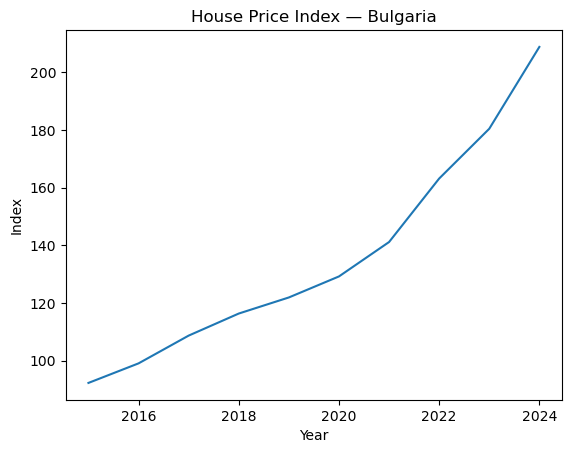

In [17]:
import matplotlib.pyplot as plt

hpi_bg = hpi[hpi["geo"] == "Bulgaria"].sort_values("time")
hpi_bg.plot(x="time", y="value", legend=False)
plt.title("House Price Index — Bulgaria")
plt.xlabel("Year"); plt.ylabel("Index")
plt.show()

In [21]:
earn = pd.read_csv(PROC / "net_earnings_tidy.csv")

hpi_ = hpi.rename(columns={"value": "house_price_index"})
earn_ = earn.rename(columns={"value": "net_earnings"})

hpi_.head(), earn_.head()

(       geo  time  house_price_index                            unit
 0  Austria  2015             128.63  Annual average index, 2010=100
 1  Austria  2016             136.27  Annual average index, 2010=100
 2  Austria  2017             144.48  Annual average index, 2010=100
 3  Austria  2018             153.57  Annual average index, 2010=100
 4  Austria  2019             162.82  Annual average index, 2010=100,
        geo  time  net_earnings
 0  Austria  2015      34414.48
 1  Austria  2016      36707.82
 2  Austria  2017      37220.14
 3  Austria  2018      37847.53
 4  Austria  2019      41162.12)

In [22]:
df2 = hpi_[["geo","time","house_price_index"]].merge(
    earn_[["geo","time","net_earnings"]],
    on=["geo","time"],
    how="inner"
)
df2.head(), df2.shape

(       geo  time  house_price_index  net_earnings
 0  Austria  2015             128.63      34414.48
 1  Austria  2016             136.27      36707.82
 2  Austria  2017             144.48      37220.14
 3  Austria  2018             153.57      37847.53
 4  Austria  2019             162.82      41162.12,
 (316, 4))